## Final Project Submission

Please fill out:
* Student name: Joseph Karigo Matheri
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL:


# Business Understanding

# Data Understanding
## Using Pandas in exploring the data and understand structure and features

- importing the important modules for wrangling our data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import os

- Loading our data files; "im1.db" and "bom.movie_gross.csv" and connecting to the database as well
- Use GROUP BY statements in SQL to apply aggregate functions like: COUNT, MAX, MIN, and SUM
- Create an alias in a SQL query
- Use the HAVING clause to compare different aggregates
- Use the WHERE and HAVING clause

### The Enterprise Relational Database Overview

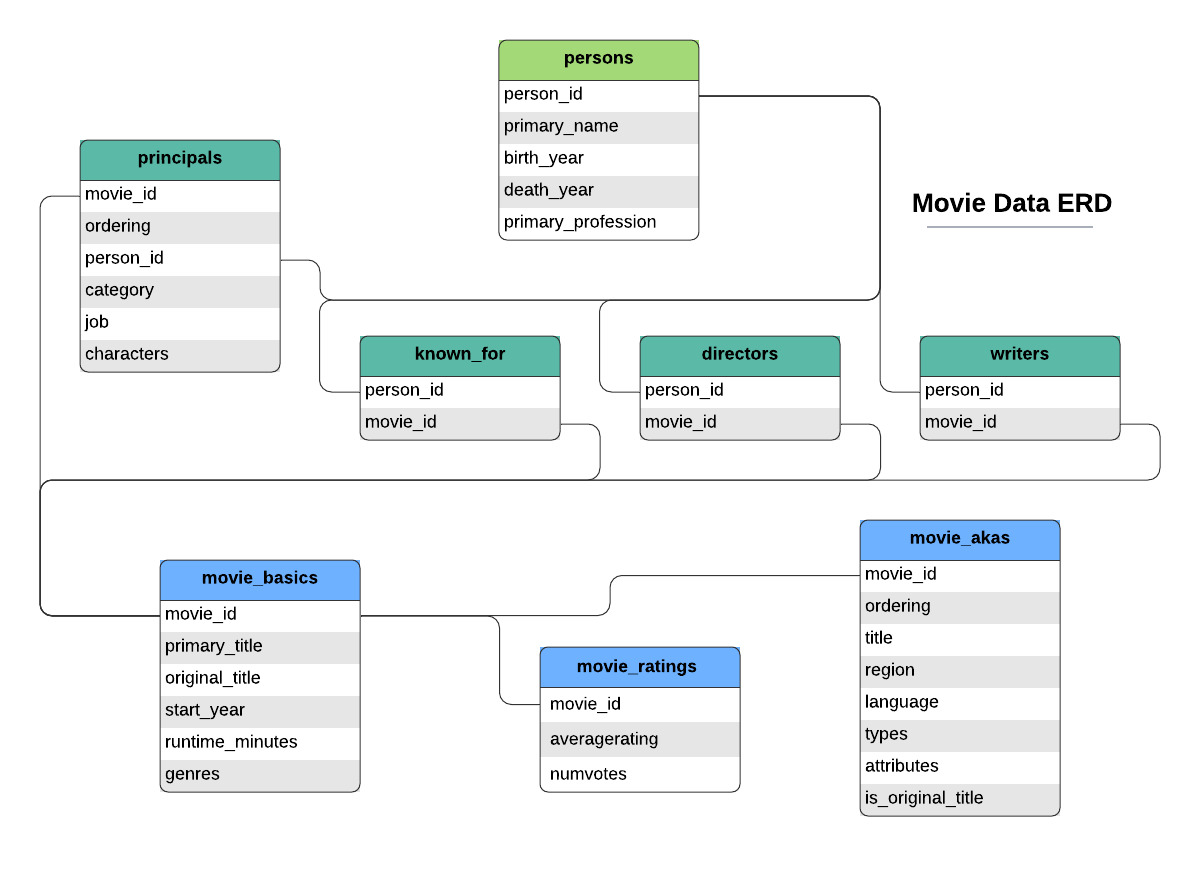

In [2]:
from IPython.display import Image, display
display(Image(filename="movie_data_erd.jpeg"))

In [3]:
db_path = os.path.join("zippedData", "im.db", "im.db")
conn = sqlite3.Connection(db_path)

In [4]:
movies_basics_on_sql = """SELECT * FROM movie_basics;"""
pd.read_sql(movies_basics_on_sql, conn).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [5]:
movie_rates_on_sql = """SELECT * FROM movie_ratings;"""
pd.read_sql(movie_rates_on_sql, conn).head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [6]:
movie_akas_on_sql = """SELECT * FROM movie_akas;"""
pd.read_sql(movie_akas_on_sql, conn).head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [7]:
# group by movie id to get the movie with the highest number of votes
movie_votes = """
SELECT movie_id, 
MAX(numvotes) AS movie_with_hihg_votes
FROM movie_ratings
GROUP BY movie_id
ORDER BY movie_with_hihg_votes DESC
LIMIT 15
;
"""
# Displaying just the first 10 genres for readability
pd.read_sql(movie_votes, conn).head(10)

,movie_id,movie_with_hihg_votes
0,tt1375666,1841066
1,tt1345836,1387769
2,tt0816692,1299334
3,tt1853728,1211405
4,tt0848228,1183655
5,tt0993846,1035358
6,tt1130884,1005960
7,tt2015381,948394
8,tt1431045,820847
9,tt1392170,795227


## Identifying the primary title and genre of the movie with the highest number of votes

In [8]:
movie_akas_on_sql = """SELECT * FROM movie_akas;"""
pd.read_sql(movie_akas_on_sql, conn).head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


## We now start by dropping the unpopular languages and null values on the runtime column

In [9]:
no_of_rows = """SELECT COUNT(*) FROM movie_akas;"""
rows = conn.execute(no_of_rows).fetchone()[0]

no_of_columns = """PRAGMA table_info(movie_akas);"""
columns = len(conn.execute(no_of_columns).fetchall())

print(rows, columns)

331703 8


## Identifying the most popular genre and pick the first 15 for further analysis

#### We shall limit this to 15 as we try to remain with the most relevant data

In [10]:
movie_genre = """
SELECT genres, COUNT(*) AS genre_totals
FROM movie_basics
GROUP BY genres
ORDER BY genre_totals DESC
LIMIT 15
;
"""
# Displaying just the first 10 genres for readability
pd.read_sql(movie_genre, conn).head(15)

,genres,genre_totals
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


### Findings: Documentary appears to be the most popular genre followed by Drama and Comedy


In [11]:
# Loading the above data to a data frame for further analysis
results = conn.execute(movie_genre).fetchall()
df = pd.DataFrame(results, columns=["genres", "genre_totals"])
df

,genres,genre_totals
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


# Visualizing our findings to get a clear description of the variances in popularity by genre

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

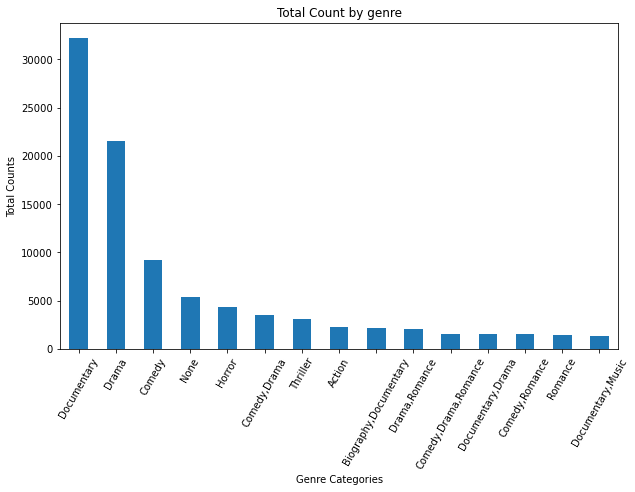

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind="bar", x="genres", y="genre_totals", ax=ax, legend=False)
ax.set_title("Total Count by genre")
ax.set_xlabel("Genre Categories")
ax.set_ylabel("Total Counts")
plt.xticks(rotation=60)
plt.show()

# Recomendation as per the movie genre:
### - Documentary is the most popular thus the most promissing option to settle for given the clear view of the variance in popularity of the movies, Drama follows in second position which brings about a course for further analysis to see if it can be a better options given other considerations.

## Checking the significance of missing data from our file to see if it has any variances to our findings so that we get to our actual findings

In [20]:
movies_basics = """SELECT * FROM movie_basics;"""

imdb_df = pd.read_sql(movies_basics, conn)
all_basics_rows = imdb_df.shape[0]
all_basics_rows

146144

In [46]:
imdb_df = pd.DataFrame(imdb_df)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [42]:
# Getting totals of all the missing values per column
missing_genres_rows = imdb_df.isnull().sum()
missing_genres_rows

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

### Dropping missing values to see impact through visualization

In [44]:
cleaned_df = imdb_df.dropna(subset=["genres"])
cleaned_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


# There are no missing values in the genres column which we used in analysing our data thus our findings stands and Documentary is the best and most popular genre to pick.

In [47]:
conn.close()

# Loading our second file to use in further analysis in identifying the best genre Microsoft should settle for in their business

In [49]:
csv_file_path = "zippedData/bom.movie_gross.csv/bom.movie_gross.csv"
bom_df = pd.read_csv(csv_file_path)
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [50]:
# Checking for missing values in our dataframe
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [53]:
bom_df.shape

(3387, 5)

### Findings: The bom.movie_gross.csv dataset does not provide information that can be used to provide insights as to what movie genre is the best or most preferred. 

## Loading new dataset for further analysis 'tmdb.movies.csv'

In [58]:
# checking other datasets for insights 
csv_file_path2 = "zippedData/tmdb.movies.csv/tmdb.movies.csv"
tmdb_df = pd.read_csv(csv_file_path2)
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [61]:
# check for popular language to be considered.
language_counts = tmdb_df["original_language"].value_counts()
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ["original_language", "count"]

# Limiting the result to top 15 most popular languages
top_15_language_counts_df = language_counts_df.head(15)
print(top_15_language_counts_df)

   original_language  count
0                 en  23291
1                 fr    507
2                 es    455
3                 ru    298
4                 ja    265
5                 de    237
6                 zh    177
7                 hi    172
8                 it    123
9                 pt     96
10                ko     93
11                sv     68
12                da     54
13                pl     52
14                no     50


### Findings: English (en) is the most popular language followed by France (fr) and Espanyol (es) thus I recommend English movies as the best choice for Microsoft